In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame
from ipykernel import kernelapp as app
import datetime


# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
!pip install xgboost

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
import xgboost as xgb

In [2]:
# get airbnb & test csv files as a DataFrame
airbnb_df  = pd.read_csv('train_users_2.csv')
#test_df    = pd.read_csv('test_users.csv')

# preview the data
print(airbnb_df.head())
print("----------------------------")
#print(test_df.head ())

           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn              6/28/10            2.009030e+13                NaN   
1  820tgsjxq7              5/25/11            2.009050e+13                NaN   
2  4ft3gnwmtx              9/28/10            2.009060e+13             8/2/10   
3  bjjt8pjhuk              12/5/11            2.009100e+13             9/8/12   
4  87mebub9p4              9/14/10            2.009120e+13            2/18/10   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app 

In [3]:
airbnb_df.info()
print("----------------------------")
#test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null float64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 26.1+ MB
-------------------------

In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
airbnb_df  = airbnb_df.drop(['date_account_created','timestamp_first_active'], axis=1)
#test_df    = test_df.drop(['date_account_created','timestamp_first_active'], axis=1)
print(airbnb_df.head())
print("----------------------------")
#print(test_df.head())

           id date_first_booking     gender   age signup_method  signup_flow  \
0  gxn3p5htnn                NaN  -unknown-   NaN      facebook            0   
1  820tgsjxq7                NaN       MALE  38.0      facebook            0   
2  4ft3gnwmtx             8/2/10     FEMALE  56.0         basic            3   
3  bjjt8pjhuk             9/8/12     FEMALE  42.0      facebook            0   
4  87mebub9p4            2/18/10  -unknown-  41.0         basic            0   

  language affiliate_channel affiliate_provider first_affiliate_tracked  \
0       en            direct             direct               untracked   
1       en               seo             google               untracked   
2       en            direct             direct               untracked   
3       en            direct             direct               untracked   
4       en            direct             direct               untracked   

  signup_app first_device_type first_browser country_destination  
0

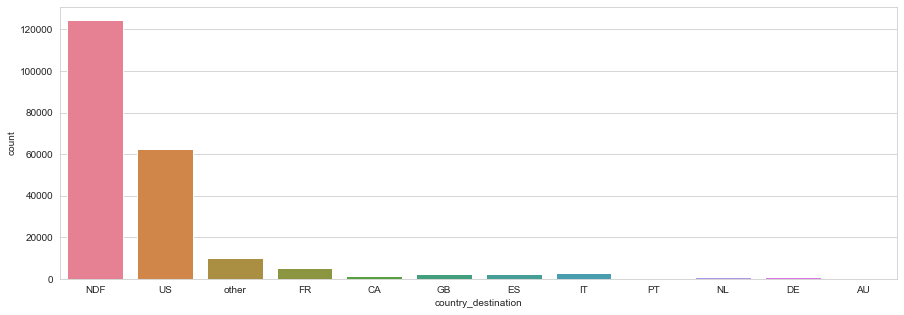

In [5]:
# country_destination

airbnb_df['booked'] = (airbnb_df['country_destination'] != 'NDF').astype(int)
#airbnb_df['booked_Outside US'] = (airbnb_df['country_destination'] != 'NDF','US').astype(int)
# test_df['booked']   = (test_df['country_destination'] != 'NDF').astype(int)


#users$country = factor(ifelse(users$country_destination == 'US', 'US',
#                              ifelse(users$country_destination == 'NDF', 'NDF', 'Outside US')))



# Plot the frequency for every country_destination value
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=airbnb_df, palette="husl", ax=axis1)
#sns.countplot(x='booked', data=airbnb_df, palette="husl", ax=axis1)

# Plot the frequency for simple 3 troup country_destination value  ===>#2
#fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
#sns.countplot(x='country_destination', data=airbnb_df, palette="husl", ax=axis1)

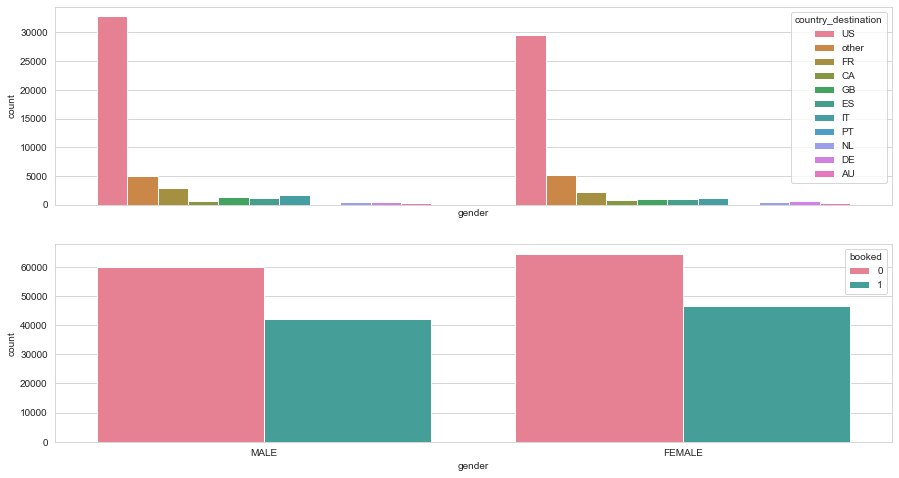

In [6]:
# gender

i = 0
def get_gender(gender):
    global i
    if gender != 'FEMALE' and gender != 'MALE':
        return 'FEMALE' if(i % 2) else 'MALE'
    i = i + 1
    return gender

# replace all values other than 'FEMALE' and 'MALE'
airbnb_df['gender'] = airbnb_df['gender'].apply(get_gender)
#test_df['gender']   = test_df['gender'].apply(get_gender)

# Plot
fig, (axis1, axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# frequency of country_destination for every gender
sns.countplot(x="gender",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)

# frequency of booked Vs no-booking users for every gender
sns.countplot(x="gender",hue="booked", data=airbnb_df, palette="husl", ax=axis2)

# Map gender values to 1s and 0s
airbnb_df["gender"] = airbnb_df["gender"].map({"FEMALE": 1, "MALE": 0})
#test_df["gender"]   = test_df["gender"].map({"FEMALE": 1, "MALE": 0})

# drop columns
#airbnb_df.drop(['gender'], axis=1,inplace=True)
#test_df.drop(['gender'], axis=1,inplace=True)

C:\Users\sophie\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sophie\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


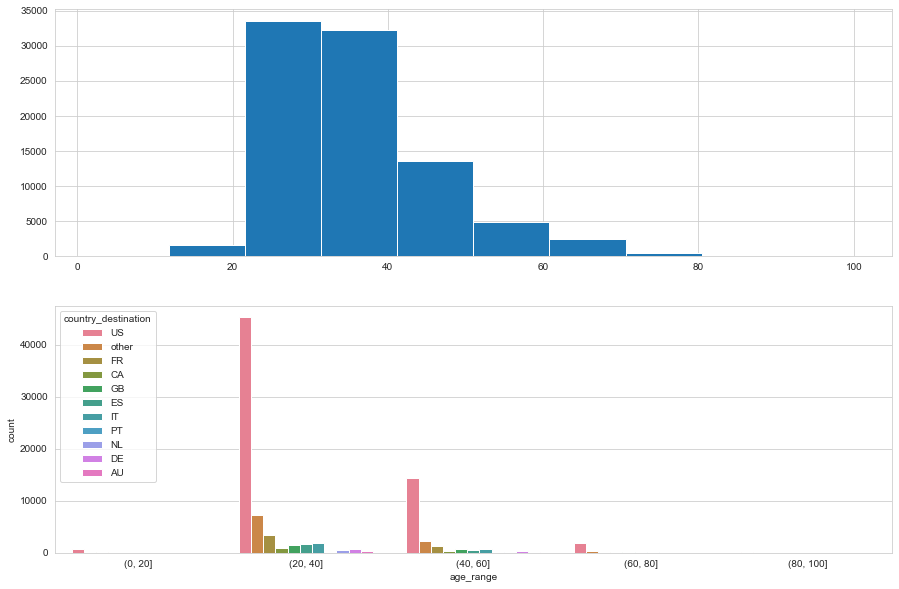

In [7]:
# age

# assign all age values > 100 to NaN, these NaN values will be replaced with real ages below
airbnb_df["age"][airbnb_df["age"] > 100] = np.NaN
#test_df["age"][test_df["age"] > 100]     = np.NaN

# get average, std, and number of NaN values in airbnb_df
average_age_airbnb   = airbnb_df["age"].mean()
std_age_airbnb       = airbnb_df["age"].std()
count_nan_age_airbnb = airbnb_df["age"].isnull().sum()

# get average, std, and number of NaN values in test_df
#verage_age_test   = test_df["age"].mean()
#std_age_test       = test_df["age"].std()
#count_nan_age_test = test_df["age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_airbnb - std_age_airbnb, average_age_airbnb + std_age_airbnb, size = count_nan_age_airbnb)
#rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# fill NaN values in Age column with random values generated
airbnb_df["age"][np.isnan(airbnb_df["age"])] = rand_1
#test_df["age"][np.isnan(test_df["age"])]     = rand_2

# convert type to integer
airbnb_df['age'] = airbnb_df['age'].astype(int)
#test_df['age']   = test_df['age'].astype(int)

# Plot
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(15,10))

# frequency for age values(in case there was a booking)
airbnb_df['age'][airbnb_df['country_destination'] != 'NDF'].hist(ax=axis1)

# cut age values into ranges 
airbnb_df['age_range'] = pd.cut(airbnb_df["age"], [0, 20, 40, 60, 80, 100])

# frequency of country_destination for every age range
sns.countplot(x="age_range",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis2)

# drop age_range
airbnb_df.drop(['age_range'], axis=1, inplace=True)

# drop columns
#airbnb_df.drop(['age'], axis=1,inplace=True)
#test_df.drop(['age'], axis=1,inplace=True)

In [8]:
# first_affiliate_tracked

# fill NaN values randomly
count_first_affiliate = 7    # len(np.unique(airbnb_df["first_affiliate_tracked"].value_counts()))

count_nan_department_airbnb = airbnb_df["first_affiliate_tracked"].isnull().sum()
#count_nan_department_test   = test_df["first_affiliate_tracked"].isnull().sum()

rand_1 = np.random.randint(0, count_first_affiliate, size = count_nan_department_airbnb)
#rand_2 = np.random.randint(0, count_first_affiliate, size = count_nan_department_test)

range_departments_airbnb = airbnb_df['first_affiliate_tracked'].value_counts()
#range_departments_test   = test_df['first_affiliate_tracked'].value_counts()

airbnb_df["first_affiliate_tracked"][airbnb_df["first_affiliate_tracked"] != airbnb_df["first_affiliate_tracked"]] = range_departments_airbnb[rand_1]
#test_df["first_affiliate_tracked"][test_df["first_affiliate_tracked"] != test_df["first_affiliate_tracked"]]       = range_departments_test[rand_2]


#print (first_affiliate_tracked.head())
# drop columns
airbnb_df.drop(['first_affiliate_tracked'], axis=1,inplace=True)
#test_df.drop(['first_affiliate_tracked'], axis=1,inplace=True)

C:\Users\sophie\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


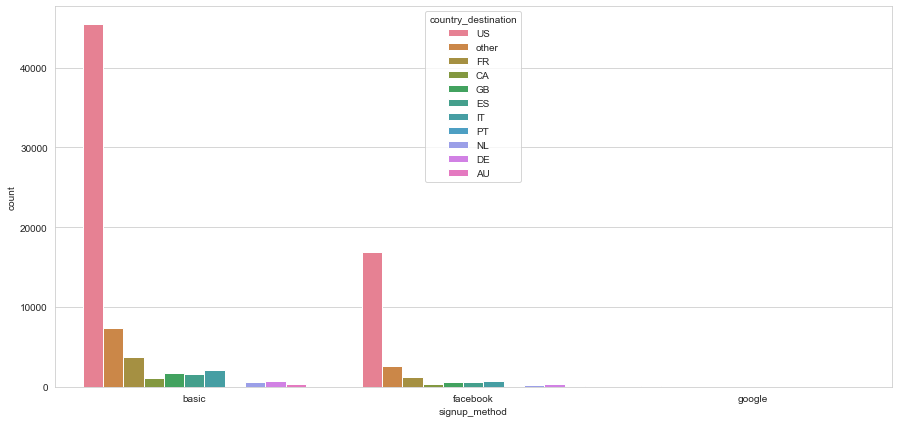

In [9]:
fig, (axis1) = plt.subplots(1,sharex=True,figsize=(15,7))
sns.countplot(x="signup_method",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)

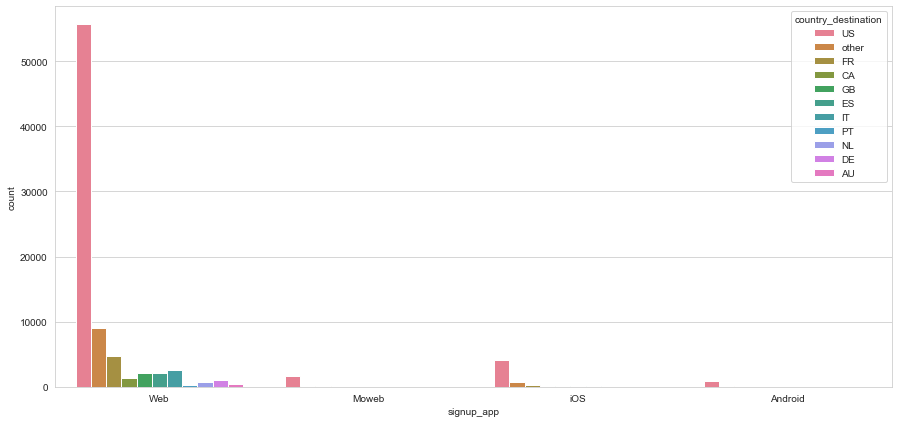

In [10]:
fig, (axis1) = plt.subplots(1,sharex=True,figsize=(15,7))
sns.countplot(x="signup_app",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)

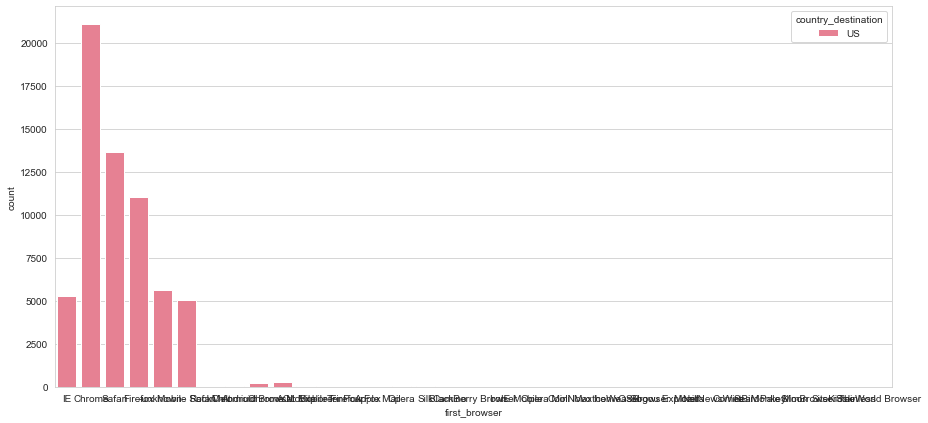

In [11]:
fig, (axis1) = plt.subplots(1,sharex=True,figsize=(15,7))
sns.countplot(x="first_browser",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] == 'US'], palette="husl", ax=axis1)

In [12]:
# signup_method
airbnb_df["signup_method"] = (airbnb_df["signup_method"] == "basic").astype(int)
#test_df["signup_method"]   = (test_df["signup_method"] == "basic").astype(int)

# signup_flow
airbnb_df["signup_flow"] = (airbnb_df["signup_flow"] == 3).astype(int)
#test_df["signup_flow"]   = (test_df["signup_flow"] == 3).astype(int)

# language
airbnb_df["language"] = (airbnb_df["language"] == 'en').astype(int)
#test_df["language"]   = (test_df["language"] == 'en').astype(int)

# affiliate_channel
airbnb_df["affiliate_channel"] = (airbnb_df["affiliate_channel"] == 'direct').astype(int)
#test_df["affiliate_channel"]   = (test_df["affiliate_channel"] == 'direct').astype(int)

# affiliate_provider
airbnb_df["affiliate_provider"] = (airbnb_df["affiliate_provider"] == 'direct').astype(int)
#test_df["affiliate_provider"]   = (test_df["affiliate_provider"] == 'direct').astype(int)

print(airbnb_df.head())

           id date_first_booking  gender  age  signup_method  signup_flow  \
0  gxn3p5htnn                NaN       0   33              0            0   
1  820tgsjxq7                NaN       0   38              0            0   
2  4ft3gnwmtx             8/2/10       1   56              1            1   
3  bjjt8pjhuk             9/8/12       1   42              0            0   
4  87mebub9p4            2/18/10       1   41              1            0   

   language  affiliate_channel  affiliate_provider signup_app  \
0         1                  1                   1        Web   
1         1                  0                   0        Web   
2         1                  1                   1        Web   
3         1                  1                   1        Web   
4         1                  1                   1        Web   

  first_device_type first_browser country_destination  booked  
0       Mac Desktop        Chrome                 NDF       0  
1       Mac Deskto

In [13]:
# There are some columns with non-numerical values(i.e. dtype='object'),
# So, We will create a corresponding unique numerical value for each non-numerical value in a column of training and testing set.

from sklearn import preprocessing

for f in airbnb_df.columns:
    if f == "country_destination" or f == "id": continue
    if airbnb_df[f].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(airbnb_df[f].values))) #list(test_df[f].values)))
        airbnb_df[f] = lbl.transform(list(airbnb_df[f].values))

print(airbnb_df.head())
#for f in test_df.columns:        
#    if f == "country_destination" or f == "id": continue
#    if test_df[f].dtype == 'object':
#        lbl = preprocessing.LabelEncoder()
#        lbl.fit(np.unique(list(airbnb_df[f].values) + list(test_df[f].values)))
#        #airbnb_df[f] = lbl.transform(list(airbnb_df[f].values))
#        test_df[f]   = lbl.transform(list(test_df[f].values))

           id  date_first_booking  gender  age  signup_method  signup_flow  \
0  gxn3p5htnn                1976       0   33              0            0   
1  820tgsjxq7                1976       0   38              0            0   
2  4ft3gnwmtx                1726       1   56              1            1   
3  bjjt8pjhuk                1968       1   42              0            0   
4  87mebub9p4                 686       1   41              1            0   

   language  affiliate_channel  affiliate_provider  signup_app  \
0         1                  1                   1           2   
1         1                  0                   0           2   
2         1                  1                   1           2   
3         1                  1                   1           2   
4         1                  1                   1           2   

   first_device_type  first_browser country_destination  booked  
0                  3              8                 NDF       0  
1 

In [14]:
airbnb_df.to_csv('airbnb_clean train.csv', index=False)

In [15]:
airbnb_df_1= pd.read_csv('airbnb_clean train.csv')    

airbnb_df_1.info()
print(airbnb_df_1.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 14 columns):
id                     213451 non-null object
date_first_booking     213451 non-null int64
gender                 213451 non-null int64
age                    213451 non-null int64
signup_method          213451 non-null int64
signup_flow            213451 non-null int64
language               213451 non-null int64
affiliate_channel      213451 non-null int64
affiliate_provider     213451 non-null int64
signup_app             213451 non-null int64
first_device_type      213451 non-null int64
first_browser          213451 non-null int64
country_destination    213451 non-null object
booked                 213451 non-null int64
dtypes: int64(12), object(2)
memory usage: 22.8+ MB
           id  date_first_booking  gender  age  signup_method  signup_flow  \
0  gxn3p5htnn                1976       0   33              0            0   
1  820tgsjxq7                1976       0   38   

In [16]:
# define training and testing sets

y = airbnb_df_1["country_destination"]
#X = airbnb_df_1.drop(["country_destination", "id", 'booked'],axis=1,inplace=True)
X = airbnb_df_1.iloc[:, [2,3,4,5,6,7,8,9,10, 11]].values

print(X[0:10])

[[ 0 33  0  0  1  1  1  2  3  8]
 [ 0 38  0  0  1  0  0  2  3  8]
 [ 1 56  1  1  1  1  1  2  6 21]
 [ 1 42  0  0  1  1  1  2  3 17]
 [ 1 41  1  0  1  1  1  2  3  8]
 [ 1 32  1  0  1  0  0  2  3  8]
 [ 1 46  1  0  1  0  0  2  3 41]
 [ 1 47  1  0  1  1  1  2  3 41]
 [ 1 50  1  0  1  0  0  2  3 41]
 [ 0 46  1  0  1  0  0  2  3 17]]


In [17]:
# modify country_destination to numerical values

country_num_dic = {'NDF': 0, 'US': 1, 'other': 2, 'FR': 3, 'IT': 4, 'GB': 5, 'ES': 6, 'CA': 7, 'DE': 8, 'NL': 9, 'AU': 10, 'PT': 11}
num_country_dic = {y:x for x,y in country_num_dic.items()}
print(y[0:10])
y= y.map(country_num_dic)
print("The shape of y is" + str(y.shape))
print(y[0:10])

#airbnb_df_1.info()
#print(airbnb_df_1.head(10))



0      NDF
1      NDF
2       US
3    other
4       US
5       US
6       US
7       US
8       US
9       US
Name: country_destination, dtype: object
The shape of y is(213451,)
0    0
1    0
2    1
3    2
4    1
5    1
6    1
7    1
8    1
9    1
Name: country_destination, dtype: int64


In [18]:
 
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[0:10])
print(y_train[0:10])
print(X_test[0:10])
print(y_test[0:10])

[[ 0.95775281  0.69215875  0.6307385  -0.2081499   0.18561853  0.74130198
   0.74367075 -0.018771   -0.92911099  1.59124286]
 [-1.04411075  0.19098681  0.6307385  -0.2081499   0.18561853  0.74130198
   0.74367075 -0.018771    1.69442008  0.73786222]
 [-1.04411075 -1.31252902 -1.58544309 -0.2081499   0.18561853  0.74130198
   0.74367075 -0.018771   -0.92911099 -0.75555391]
 [ 0.95775281 -0.91159147 -1.58544309 -0.2081499   0.18561853  0.74130198
   0.74367075  2.11244296  1.69442008 -1.32447434]
 [-1.04411075  0.89262753 -1.58544309 -0.2081499   0.18561853  0.74130198
   0.74367075 -0.018771    0.64500765 -0.75555391]
 [ 0.95775281 -0.10971636 -1.58544309 -0.2081499   0.18561853 -1.34897792
  -1.34468111 -0.018771   -0.92911099 -0.11551843]
 [-1.04411075 -1.71346658 -1.58544309 -0.2081499  -5.38739325 -1.34897792
  -1.34468111  2.11244296 -0.92911099  1.59124286]
 [ 0.95775281 -0.20995075  0.6307385  -0.2081499   0.18561853 -1.34897792
  -1.34468111 -0.018771    0.64500765 -0.11551843]


C:\Users\sophie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sophie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sophie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
# ====> INSERT YOUR CLASSIFIER CODE HERE <====
# Fitting classifier to the Training set
# Create your classifier here

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
random_forest.fit(X_train, y_train) 
# ====> INSERT YOUR CLASSIFIER CODE HERE <====

# Predicting the Test set results
#y_pred = random_forest.predict(X_test)
y_pred = random_forest.predict(X_test)
print(y_pred[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [20]:
# Random Forests

score=random_forest.score(X_train, y_train)
print("Random Forests Predict Score is:"+str(score))


#print("Y_test_predict shape is:"+str(Y_pred.shape))
#print("Y_test_predict is"+str(Y_pred[0:100]))
#print("the difference between Y_Train and Y_Pred is"+str(Y_pred[0:100]-Y_train[0:100]))
#Y_pred = random_forest.predict(X_test)

Random Forests Predict Score is:0.62047748738194


In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[28155  2805   158    55    38    25    13    13    13     9     6     1]
 [12871  2449    94    47    28    15     7     6     5     6     1     4]
 [ 2123   374    22     5     3     3     0     2     1     4     1     0]
 [  982   205     7     4     0     6     0     1     1     0     0     0]
 [  521   129     2     5     3     0     0     0     1     0     0     0]
 [  483   112     3     1     0     0     0     0     2     2     0     0]
 [  456    98     1     0     1     1     0     1     1     1     0     0]
 [  274    59     2     1     1     2     0     0     2     0     0     0]
 [  197    53     0     1     0     3     0     0     0     0     0     0]
 [  152    34     0     0     0     1     0     0     0     1     0     0]
 [  108    22     0     1     0     0     0     0     0     0     0     0]
 [   50     7     0     0     0     0     0     0     0     0     0     0]]


In [22]:
feat_labels = ['gender','age','signup_method', 'signup_flow', 'language','affiliate_channel','affiliate_provide', 'signup_app', 'first_device_type','first_browser']

for feature in zip(feat_labels, random_forest.feature_importances_):
    print(feature)


('gender', 0.055263494555169934)
('age', 0.6402151564353515)
('signup_method', 0.050275264407166655)
('signup_flow', 0.019784937697245895)
('language', 0.021148104926054803)
('affiliate_channel', 0.009614297763814224)
('affiliate_provide', 0.010012006099172289)
('signup_app', 0.04910588853124658)
('first_device_type', 0.056344161283341354)
('first_browser', 0.08823668830143676)


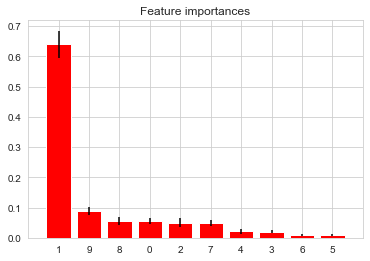

In [23]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

<Figure size 432x288 with 0 Axes>

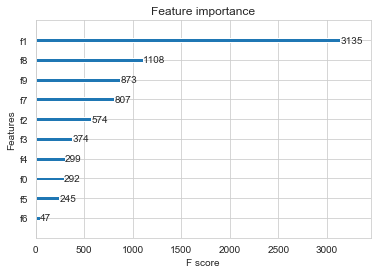

In [24]:
model = xgb.XGBClassifier()
model.fit(X, y)
import matplotlib.pyplot as plt
from matplotlib import pyplot
from xgboost import plot_importance
fig1=plt.gcf()
plot_importance(model)
plt.draw()
fig1.savefig('xgboost.png', figsize=(50, 40), dpi=1000)